In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

pd.options.mode.chained_assignment = None

# Import Data

In [75]:
# Import the data
df = pd.read_csv("crowding_data.csv", low_memory=False)


In [76]:
# View column names and drop unnecesary columns for the model 
df.columns


Index(['id', 'expid', 'membid', 'myear', 'sex', 'calcage', 'citizen', 'status',
       'msolo', 'msuccess', 'msmtdate1', 'msmtdate2', 'msmtdate3', 'route1',
       'route2', 'route3', 'route4', 'mo2used', 'mo2none', 'mo2climb',
       'mo2descent', 'mo2sleep', 'death', 'deathdate', 'msmtbid', 'stdrte',
       'new_route', 'new_status', 'climber_count'],
      dtype='object')

# Feature Selection

In [59]:
# Set features
feature_names = ['sex', 'calcage', 'citizen', 'msolo', 'new_route', 'mo2used', 'mo2climb',
                 'mo2descent', 'mo2sleep', 'stdrte', 'new_status', 'climber_count']

X = df[feature_names]

In [60]:
# Convert X values to numerical 

###                KEY                  ### 
###        Male = 0, Female = 1         ###
###        True = 1, False = 0          ###
###  Citizen and Route = see label map  ###

X.replace(True, 1, inplace=True)
X['sex'] = pd.get_dummies(X['sex'])

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

# Perform label transformation and create label maps for later use 
X['citizen'] = le.fit_transform(X['citizen'])
country_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_route'] = le.fit_transform(X['new_route'])
route_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_status'] = le.fit_transform(X['new_route'])
status_label_map = dict(zip(le.classes_, le.transform(le.classes_)))

X

,sex,calcage,citizen,msolo,new_route,mo2used,mo2climb,mo2descent,mo2sleep,stdrte,new_status,climber_count
0,0,32,15,0.0,2,1.0,1.0,0.0,1.0,1.0,2,3.0
1,0,40,82,0.0,2,0.0,0.0,0.0,0.0,1.0,2,3.0
2,0,29,82,0.0,2,1.0,1.0,0.0,1.0,1.0,2,3.0
3,0,37,82,0.0,1,0.0,0.0,0.0,0.0,0.0,1,3.0
4,0,33,82,0.0,1,0.0,0.0,0.0,0.0,0.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15003,1,16,27,0.0,0,1.0,1.0,0.0,1.0,1.0,0,15.0
15004,0,37,27,0.0,0,1.0,1.0,0.0,1.0,1.0,0,15.0
15005,0,57,27,0.0,0,1.0,1.0,0.0,1.0,1.0,0,15.0
15006,0,35,27,0.0,0,1.0,1.0,0.0,1.0,1.0,0,15.0


# Target Selection

In [61]:
target_names = df['msuccess'].unique()
target_names


array([False,  True])

In [62]:
y  = df['msuccess']

# Create a Train Test Split


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [64]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [65]:
# Convert the y values to numerical using label_encoder/to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_test_categorical

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Train the Model



In [66]:
# Create and initial trial model and add layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=60, activation='relu', input_dim=inputs))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))


In [67]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 60)                780       
_________________________________________________________________
dense_7 (Dense)              (None, 200)               12200     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 402       
Total params: 13,382
Trainable params: 13,382
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    )

Epoch 1/100
352/352 - 1s - loss: 0.4361 - accuracy: 0.8199
Epoch 2/100
352/352 - 0s - loss: 0.4093 - accuracy: 0.8353
Epoch 3/100
352/352 - 0s - loss: 0.4072 - accuracy: 0.8347
Epoch 4/100
352/352 - 0s - loss: 0.4031 - accuracy: 0.8364
Epoch 5/100
352/352 - 0s - loss: 0.4027 - accuracy: 0.8364
Epoch 6/100
352/352 - 0s - loss: 0.4021 - accuracy: 0.8355
Epoch 7/100
352/352 - 0s - loss: 0.3994 - accuracy: 0.8360
Epoch 8/100
352/352 - 0s - loss: 0.3990 - accuracy: 0.8364
Epoch 9/100
352/352 - 0s - loss: 0.3978 - accuracy: 0.8383
Epoch 10/100
352/352 - 0s - loss: 0.3971 - accuracy: 0.8379
Epoch 11/100
352/352 - 0s - loss: 0.3971 - accuracy: 0.8394
Epoch 12/100
352/352 - 0s - loss: 0.3953 - accuracy: 0.8381
Epoch 13/100
352/352 - 0s - loss: 0.3956 - accuracy: 0.8378
Epoch 14/100
352/352 - 0s - loss: 0.3948 - accuracy: 0.8395
Epoch 15/100
352/352 - 0s - loss: 0.3949 - accuracy: 0.8381
Epoch 16/100
352/352 - 0s - loss: 0.3937 - accuracy: 0.8399
Epoch 17/100
352/352 - 0s - loss: 0.3929 - accura

# Quantify Model


In [70]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

118/118 - 0s - loss: 0.3846 - accuracy: 0.8462
Neural Network Performace - Loss: 0.38461750745773315, Accuracy: 0.8462153673171997


In [73]:
# Print some test data to try out the preduction model 
from tensorflow.keras.models import load_model
success_model = load_model("success_model.h5")

test_values2 = X_train_scaled[50].tolist()
test_values1 = test_values[:-1]
result1 = success_model.predict([test_values1])
print(f"Chance of success for datapoint 50 is: {round(result1[0][0]*100,2)}%")

result2 = model.predict([test_values2])
print("")
print(f"With crowding model the chance of success is: {round(result2[0][1]*100,2)}%")


Chance of success for datapoint 50 is: 87.51%

With crowding model the chance of success is: 96.65%


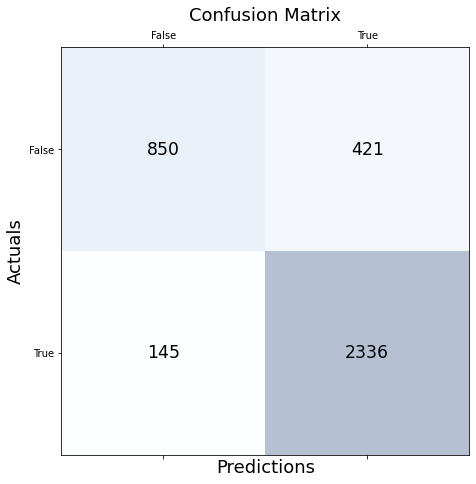

In [40]:
# Create a confusion matrix to visualise the performance 
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

# Hyperperameter tuning

#### Talos Custom Hyperparameter Optimiser for Keras, Tensorflow used 
Availble from: <a href="https://github.com/autonomio/talos/">https://github.com/autonomio/talos/</a>
<img src="https://raw.githubusercontent.com/autonomio/talos/master/logo.png">

In [42]:
import talos

# Function to run the model 
def everest(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)
    
    return out, model

In [43]:
# Create a parameter dictionary
p = {'first_neuron':[30,60,120,240],
    'hidden_layers':[1, 2],
    'batch_size': [10,20, 30],
    'epochs': [100, 150, 200],
    'dropout': [0],
    'optimizer': ['Nadam', 'Adam'],
    'losses': ['binary_crossentropy'],
    'activation':['relu'],
    'last_activation': ['sigmoid']}

In [44]:
t = talos.Scan(x=X_train_scaled, y=encoded_y_train, params=p, model=everest, experiment_name='everest_tune', round_limit=30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [25:53<00:00, 51.80s/it]


In [45]:
t.details

experiment_name            everest_tune
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            08/21/21/22:55
x_shape                     (11256, 12)
y_shape                        (11256,)
dtype: object

### Best parameters:  
  
(as per table below)  
first layer: 30  
hidden layers: 2  
activation: relu  
batch_size: 10  
epochs: 200  
dropout: 0  
optimizer: adam  
<b>accuracy:</b> 84.69%  
<b>loss:</b> 0.391798

In [46]:
# Display a dataframe comapring the results of the different combinations 
t.data

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,last_activation,losses,optimizer
0,08/21/21-222929,08/21/21-222958,28.517795,100,0.382524,0.846554,0.391210,0.841575,relu,20,0,100,120,2,sigmoid,binary_crossentropy,Nadam
1,08/21/21-222958,08/21/21-223050,52.033421,100,0.385897,0.844523,0.393752,0.843056,relu,10,0,100,30,1,sigmoid,binary_crossentropy,Adam
2,08/21/21-223050,08/21/21-223130,40.474386,150,0.387497,0.844143,0.392169,0.843648,relu,20,0,150,30,2,sigmoid,binary_crossentropy,Adam
3,08/21/21-223130,08/21/21-223150,19.096133,100,0.381258,0.844904,0.392164,0.840687,relu,30,0,100,120,1,sigmoid,binary_crossentropy,Adam
4,08/21/21-223150,08/21/21-223336,105.885855,200,0.376885,0.850616,0.395725,0.843056,relu,10,0,200,60,2,sigmoid,binary_crossentropy,Nadam
5,08/21/21-223336,08/21/21-223405,29.245488,150,0.374778,0.847443,0.391716,0.841575,relu,30,0,150,240,1,sigmoid,binary_crossentropy,Adam
6,08/21/21-223405,08/21/21-223434,29.196423,150,0.374669,0.849600,0.391096,0.843352,relu,30,0,150,240,2,sigmoid,binary_crossentropy,Adam
7,08/21/21-223434,08/21/21-223529,54.661345,200,0.382906,0.847316,0.392676,0.840687,relu,20,0,200,30,2,sigmoid,binary_crossentropy,Nadam
8,08/21/21-223529,08/21/21-223718,108.977342,200,0.382500,0.845539,0.391798,0.846906,relu,10,0,200,30,2,sigmoid,binary_crossentropy,Adam
9,08/21/21-223718,08/21/21-223747,28.269647,150,0.388526,0.841350,0.395752,0.839799,relu,30,0,150,30,1,sigmoid,binary_crossentropy,Adam


# Re-Training 

In [51]:
# Retrain the model with the optimised paramaters 

p_optimisied = {'first_neuron':30,
                'second_neuron':200,
                'hidden_layers':2,
                'batch_size': 10,
                'epochs': 200,
                'dropout': 0,
                'optimizer': 'adam',
                'activation':'relu',
               }

def everest_optimised(x_train, y_train, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
    
    model.add(Dense(params['second_neuron'], activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)

    return out, model


In [52]:
# Re-fit the training data to the model
out, model = everest_optimised(X_train_scaled, encoded_y_train, p_optimisied)

In [53]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, encoded_y_test, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

118/118 - 0s - loss: 0.4020 - accuracy: 0.8489
Neural Network Performace - Loss: 0.40195485949516296, Accuracy: 0.8488805890083313


# Save the Model

In [54]:
# Save the model
filename = 'crowding_model_success.h5'
model.save(filename)

# Load the Model

In [14]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("Model 2 - Deep_learning.h5")